# 1. Baseline

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터셋
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 2. EDA

In [3]:
# 데이터 크티
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2)) 
display(test.head(2)) # price 컬럼 제외되어 있음

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

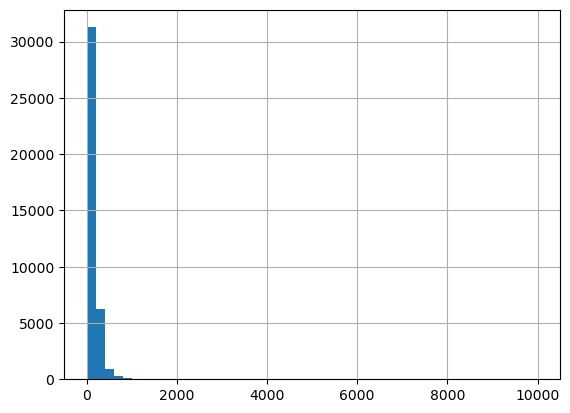

In [8]:
# target histogram
train['price'].hist(bins=50)

In [9]:
# target describe
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# feature(host_id)
train['host_id'].value_counts()

host_id
219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: count, Length: 30845, dtype: int64

# 3. 데이터 전처리

In [3]:
# 결측치 컬럼 삭제
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [4]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [5]:
# 결측치 확인
display(train.shape)
display(test.shape)

(39116, 15)

(9779, 14)

In [6]:
# 가격값 복사
target = train['price']
display(target)

# train에서 타겟(가격) 제거
train = train.drop('price', axis = 1)
display(train.shape)

0         70
1        240
2        150
3         85
4         44
        ... 
39111    185
39112     50
39113    120
39114    165
39115    200
Name: price, Length: 39116, dtype: int64

(39116, 14)

In [7]:
# 수치형 피쳐 선택
cols = ['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

train = train[cols]
test = test[cols]

display(train.head(2))
display(test.head(2))

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,94219511,40.80167,-73.95781,3,3,0.09,2,0
1,49015331,40.76037,-73.99016,2,64,1.68,2,262


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,33771081,40.70959,-73.94652,3,2,0.31,1,0
1,5308961,40.79368,-73.96487,3,159,2.09,1,244


# 4. 검증데이터 분리

In [8]:
# 라이브러리
from sklearn.model_selection import train_test_split

In [9]:
# 검증데이터 분리 / train, target
x_train, x_test, y_train, y_test= train_test_split(train, target, test_size=0.2, random_state=2022)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31292, 8), (7824, 8), (31292,), (7824,))

# 5. 머신러닝

## 5.1. 선형회귀

In [11]:
# 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
# 학습 및 예측
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

32000.46237260539

## 5.2. 릿지회귀

In [21]:
# 라이브러리
from sklearn.linear_model import Ridge

In [22]:
# 학습 및 예측
model = Ridge()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.06762e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


32002.9213658254

## 5.3. 라쏘 회귀 

In [23]:
# 라이브러리
from sklearn.linear_model import Lasso

In [24]:
# 학습 및 예측
model = Lasso()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

32695.6062162849

## 5.4. 엘라스틱넷 회귀

In [25]:
# 라이브러리
from sklearn.linear_model import ElasticNet

In [26]:
# 학습 및 예측
model = ElasticNet()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

33521.06875602843

## 5.5. 랜덤포레스트

In [27]:
# 라이브러리
from sklearn.ensemble import RandomForestRegressor

In [28]:
# 학습 및 예측
model = RandomForestRegressor(random_state=2022, n_estimators=400)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

31067.425648157918

## 5.6 XGBoost

In [12]:
# 라이브러리
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
# 하이퍼파라미터 탐색
params = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],  # 학습률 범위
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # 트리 최대 깊이 범위
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900],  # 트리 개수 범위
    'subsample': [0.6, 0.7, 0.8, 0.9]  # 각 트리가 학습에 사용하는 데이터 샘플링 비율 범위
}

xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'subsample': 0.9, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.07}

In [13]:
# 학습 및 예측
# model = XGBRegressor(max_depth=10, learning_rate=0.02, n_estimators=500, random_state=2022)
# model = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500, subsample=0.8, random_state=2022)
# model = XGBRegressor(max_depth=5, learning_rate=0.02, n_estimators=400, subsample=0.9, random_state=2022)
# model = XGBRegressor(max_depth=5, learning_rate=0.07, n_estimators=400, subsample=0.9, random_state=2022)
model = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500, subsample=0.8, random_state=2022)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

29164.85320252328

# 6. 채점

In [14]:
# test 데이터 예측 및 평가
y_test_final = pd.read_csv('data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test_final, pred)

48001.40349330543

- 후기
object 변수는 인코딩하기 귀찮아서 그냥 넘겼는데 과제 다하고 영상 보니까, 확실히 인코딩을 하면 모델 성능이 확 올라가네요.
<br/>
이런 부분 참고해서 딥러닝 할 때는 확실하게 데이터전처리 후에 모델을 만들어야 겠다는 생각이 들었습니다.